# 子空间方法的频率估计

创建一个长度为 24 个样本的复值信号。该信号由频率为 0.4 Hz 和 0.425 Hz 的两个复指数（正弦波）和加性复高斯白噪声组成。噪声的均值和方差为零0.2的平方在复数白噪声中，实部和虚部的方差都等于总方差的一半。
因为添加有随机高斯白噪声，每次运行结果不一样。 

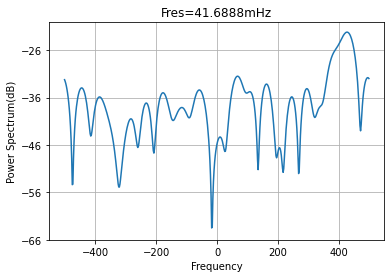

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
n=np.arange(24)
fs=1000
x=np.exp(2*np.pi*0.4*n*1j)+np.exp(2*np.pi*0.425*n*1j)+0.2/math.sqrt(2)*np.random.normal(size=n.shape)+np.random.normal(size=n.shape)*1.0j
plt.psd(x,NFFT=150,Fs=fs,window=mlab.window_none,noverlap=75, pad_to=512,scale_by_freq=True)
plt.title('Fres=41.6888mHz')
plt.ylabel('Power Spectrum(dB)')
plt.xlabel('Frequency')
plt.grid(True)
plt.show()

使用子空间方法来解析两个紧密间隔的峰。在此示例中，使用 MUSIC 方法。估计自相关矩阵并将自相关矩阵输入到pmusic中。指定具有两个正弦分量的模型。绘制结果。

<function matplotlib.pyplot.show(close=None, block=None)>

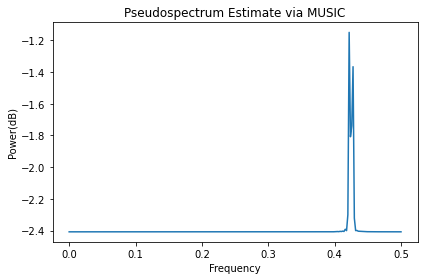

In [2]:
from scipy.linalg import toeplitz
import math
import warnings
warnings.filterwarnings("ignore")
N=256
n=np.arange(256)
x=(np.exp(2*np.pi*0.4*n*1j)+np.exp(2*np.pi*0.425*n*1j)+
   0.2/math.sqrt(2)*np.random.normal(size=n.shape)+np.random.normal(size=n.shape)*1.0j)

# 自相关函数
def xcorr(data):
    length =len(data)
    R=[]
    for m in range (0,length):
        sums=0.0
        for nn in range(0,length-m):
            sums=sums+data[nn]*data[nn+m]
        R.append(sums/length)
    return R
# 求自相关
R=xcorr(x)
# 自相关矩阵
Rx =toeplitz(R)
w,v = np.linalg.eig(Rx)
v=np.mat(v)
vh=v.H
P=[]
for index in range(0, N+1):
    ew = []
    w = index / N * np.pi
    for k in range(0, N):
        item = complex(np.cos(k * w), np.sin(k * w))
        ew.append(item)
    ew = np.mat(ew)
    ew = ew.T
    eHw = ew.H
    sums = 0
    sums = np.mat(sums)
    for j in range(3, N + 1):
        sums = sums + v[:, j - 1] * vh[j - 1,:]
    fenzi = eHw * sums * ew
    B=1/fenzi[0,0]
    B=math.log10(B)
    P.append(B)

f = np.linspace(0, N, N + 1) / (2 * N)
plt.plot(f,P)
plt.title('Pseudospectrum Estimate via MUSIC')
plt.xlabel("Frequency")
plt.ylabel("Power(dB)")
plt.tight_layout() # 自动布局
plt.show